# Data Cleaning and Analysis
 

<br>


 
## Getting background information

We’ll look at the SAT scores of high schoolers, along with various demographic and other information about them. The SAT, or Scholastic Aptitude Test, is a test that high schoolers take in the US before applying to college. Colleges take the test scores into account when making admissions decisions, so it’s fairly important to do well on. The test is divided into 3 sections, each of which is scored out of 800 points. 
<br>
* New York City is divided into 5 boroughs, which are essentially distinct regions.
<br>
* Schools in New York City are divided into several school district, each of which can contains dozens of schools.
<br>
* Not all the schools in all of the datasets are high schools, so we’ll need to do some data cleaning.
<br>
* Each school in New York City has a unique code called a DBN, or District Borough Number.
<br>
* By aggregating data by district, we can use the

## Understanding the data
Loop through each file into dataframe and put each one into dictionary 

In [285]:
import pandas
import numpy as np
import warnings
warnings.simplefilter('ignore')

files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]
data = {} # dictionary
for f in files:
    d = pandas.read_csv("{0}".format(f)) #The brackets and characters within them (called format fields) are replaced with the objects passed into the str.format() method.
    data[f.replace(".csv", "")] = d
 

Now, use head() on DataFrame to look at first 3 lines
And we find some useful pattern:

1.Most of the datasets contain a DBN column.
<br>
2.Some of the datasets appear to contain multiple rows for each school (repeated DBN values), which means we’ll have to do some preprocessing.

In [286]:
type(data['demographics'] )

for k,v in data.items():  #items() method is used to return the list with all dictionary keys with values.
    print("\n" + k + "\n")
    #print(v.head(3))
    print(v.columns)



ap_2010

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

class_size

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

demographics

Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_per', 

## Unifying the data

We’ll need to unify all the individual datasets into a single by a common column. This will enable us to quickly compare columns across datasets. The 'DBN' column looks like this:


In [287]:
data["demographics"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

But class_size, and hs_directory don’t have a DBN field. We look their columns and found 'DBN' is actually a combination of CSD, BOROUGH, and SCHOOL CODE.

In [36]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [39]:
data["hs_directory"].head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,DISTRICT 01,91.18,12367
1,DISTRICT 02,89.01,60823
2,DISTRICT 03,89.28,21962
3,DISTRICT 04,91.13,14252
4,DISTRICT 05,89.08,13170


Now that we are going to construct the DBN, we can add it into the class_size and hs_directory datasets:

In [289]:
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]
data["class_size"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

## Adding in the surveys
Let' look at surveys data which include information about the perceived safety of each school, academic standards, and more.
<br>
We’ll add the survey data into our data dictionary, and then combine all the datasets afterwards.

In [290]:
survey1 = pandas.read_csv("masterfile11_gened_final.txt", delimiter="\t", encoding='windows-1252')
survey2 = pandas.read_csv("masterfile11_d75_final.txt", delimiter="\t", encoding='windows-1252')
 
 

In [291]:
survey1["d75"] = False
survey2["d75"] = True
survey = pandas.concat([survey1, survey2], axis=0) ##按列名合并
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [89]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


The survey data has many columns that aren’t very useful to us: 
<br>
We can then remove any extraneous columns in survey:

In [292]:
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1702, 23)

## Condensing datasets
If we take a look at some of the datasets, including class_size, There are several rows for each high school (as you can see by the repeated DBN and SCHOOL NAME fields). However, if we take a look at the sat_results dataset, it only has one row per high school.

In [91]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [92]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In order to combine these datasets, we’ll need to find a way to condense datasets like class_size to the point where there’s only a single row per high school. If not, there won’t be a way to compare SAT scores to class size. We can accomplish this by first understanding the data better, then by doing some aggregation. With the class_size dataset, it looks like GRADE and PROGRAM TYPE have multiple values for each school. By restricting each field to a single value, we can filter most of the duplicate rows. In the below code, we:
<br>
(1) Only select values from class_size where the GRADE field is 09-12.
<br>
(2) Only select values from class_size where the PROGRAM TYPE field is GEN ED.
<br>
(3) Group the class_size dataset by DBN, and take the average of each column. Essentially, we’ll find the average class_size values for each school.
<br>
(4) Reset the index, so DBN is added back in as a column.


In [293]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

##  Condensing other datasets
Next, we’ll need to condense the demographics dataset. We’ll only pick rows where the schoolyear field is the most recent available:

In [294]:
demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics

We’ll need to condense the math_test_results dataset. This dataset is segmented by Grade and by Year. We can select only a single grade from a single year:

In [295]:
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']

graduation needs to be condensed:

In [296]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

## Computing variables
Compute a total SAT score from the individual columns SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score.  
<br>
(1) Convert each of the SAT score columns from a string to a number.
<br>
(2) Add together all of the columns to get the sat_score column, which is the total SAT score.

In [299]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = data["sat_results"][c].replace("s", 0).convert_objects(convert_numeric=True)
     
for c in cols:
    data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

Next, we’ll need to parse out the coordinate locations of each school, so we can make maps. This will enable us to plot the location of each school. In the below code, we:

<br>
(1) Parse latitude and longitude columns from the Location 1 column.
<br>
(2) Convert lat and lon to be numeric.

In [300]:
data["hs_directory"]['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hs_directory"]['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])
for c in ['lat', 'lon']:
    data["hs_directory"][c] = data["hs_directory"][c].convert_objects(convert_numeric=True)

Now, we can print out each dataset to see what we have:
 

In [301]:
for k, v in data.items():
    print(k)
    print(v.head(3))

ap_2010
      DBN                    SchoolName  AP Test Takers   Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
1  01M450        EAST SIDE COMMUNITY HS             19.0               21.0   
2  01M515           LOWER EASTSIDE PREP             24.0               26.0   

   Number of Exams with scores 3 4 or 5  
0                                  10.0  
1                                   NaN  
2                                  24.0  
class_size
      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                               88.0                 4.0   
1  01M332    1                               46.0                 2.0   
2  01M378    1                               33.0                 1.0   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                    18.5              26.571429   
1           22.000000                    21.0              

## Combining the datasets
Now,we can combine the datasets together using the DBN column.
<br>
Some of the datasets are MISSING high schools that exist in the sat_results dataset. To resolve this, we’ll need to merge the datasets that have missing rows using the outer join strategy, so we don’t lose data. 

In [302]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)
        full.shape

class_size
0
demographics
0
graduation
0
hs_directory
0
math_test_results
0
sat_results
0
survey
0


## Adding in values
There are a few missing pieces. We may want to correlate the Advanced Placement exam results with SAT scores, but we’ll need to first convert those columns to numbers, then fill in any missing values with 0:

In [303]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    full[col] = full[col].convert_objects(convert_numeric=True)
    full[cols] = full[cols].fillna(value=0)

Then, we’ll need to calculate a school_dist column that indicates the school district of the school. This will enable us to match up school districts and plot out district-level statistics using the district maps we downloaded earlier:

In [194]:
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

Finally, we’ll need to fill in any missing values in full with the mean of the column, so we can compute correlations:

In [304]:
full = full.fillna(full.mean())

## Computing correlations
Correlations will tell you which columns are closely related to the column you’re interested in.

In [305]:
full.corr()['sat_score']

AP Test Takers                          0.333212
Total Exams Taken                       0.316064
Number of Exams with scores 3 4 or 5    0.285699
CSD                                     0.017515
NUMBER OF STUDENTS / SEATS FILLED       0.135614
NUMBER OF SECTIONS                      0.126198
AVERAGE CLASS SIZE                      0.162049
SIZE OF SMALLEST CLASS                  0.114596
SIZE OF LARGEST CLASS                   0.134877
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
frl_percent                            -0.256406
total_enrollment                        0.124126
ell_num                                -0.039577
ell_percent                            -0.124621
sped_num                                0.002574
sped_percent                           -0.199471
asian_num                               0.165026
asian_per                               0.221557
black_num                               0.000759
black_per           

This gives us quite a few insights that we’ll need to explore:
<br>

(1) Total enrollment correlates strongly with sat_score, which is surprising, because you’d think smaller schools, which focused more on the student, would have higher scores.
<br>
<br>
(2) The percentage of females at a school (female_per) correlates positively with SAT score, whereas the percentage of males (male_per) correlates negatively.
<br>
<br>
(3) None of the survey responses correlate highly with SAT scores.
<br>
<br>
(4) There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
ell_percent correlates strongly negatively with SAT scores.


## Exploring enrollment and SAT scores
Now that we’ve set the context by plotting out where the schools are, and SAT score by district, people viewing our analysis have a better idea of the context behind the dataset. 
<br>
We can explore this with a scatter plot that compares total enrollment across all schools to SAT scores across all schools.


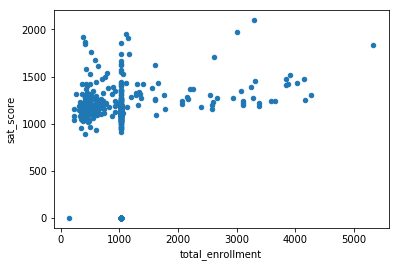

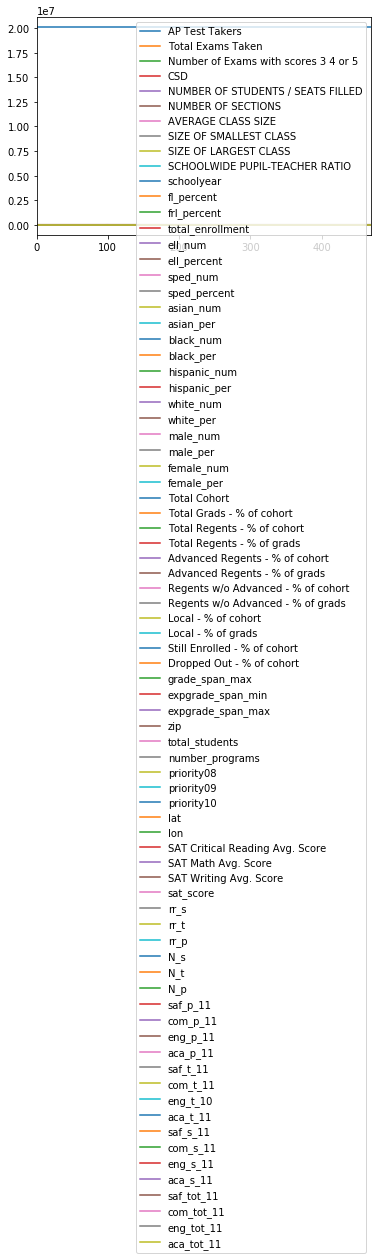

In [306]:
full.plot.scatter(x='total_enrollment', y='sat_score')
full.plot()

As you can see, there’s a cluster at the bottom left with low total enrollment and low SAT scores. Other than this cluster, there appears to only be a slight positive correlation between SAT scores and total enrollment. Graphing out correlations can reveal unexpected patterns.



 ## Exploring English language learners and SAT scores
 Now that we know the percentage of English language learners in a school is correlated with lower SAT scores, we can explore the relationship. The ell_percent column is the percentage of students in each school who are learning English

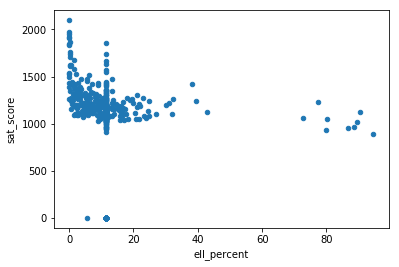

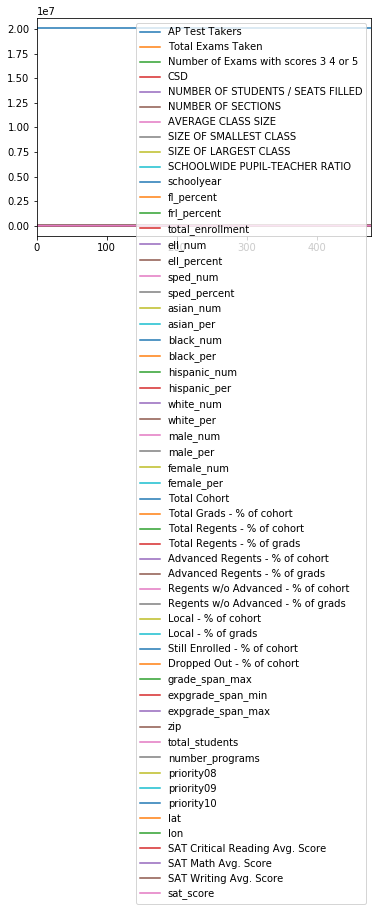

In [265]:
full.plot.scatter(x='ell_percent', y='sat_score')
full.plot()

It looks like there are a group of schools with a high ell_percentage that also have low average SAT scores.  

## Correlating survey scores and SAT scores
It would be fair to assume that the results of student, parent, and teacher surveys would have a large correlation with SAT scores. It makes sense that schools with high academic expectations, for instance, would tend to have higher SAT scores. To test this theory, lets plot out SAT scores and the various survey metrics:

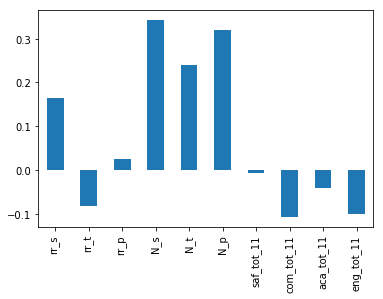

In [307]:
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

Surprisingly, the two factors that correlate the most are N_p and N_s, which are the counts of parents and students who responded to the surveys. Both strongly correlate with total enrollment, so are likely biased by the ell_learners. The other metric that correlates most is saf_t_11. That is how safe students, parents, and teachers perceived the school to be. It makes sense that the safer the school, the more comfortable students feel learning in the environment. However, none of the other factors, like engagement, communication, and academic expectations, correlated with SAT scores. This may indicate that NYC is asking the wrong questions in surveys, or thinking about the wrong factors (if their goal is to improve SAT scores, it may not be).

## Exploring race and SAT scores
One of the other angles to investigate involves race and SAT scores. There was a large correlation differential, and plotting it out will help us understand what’s happening:



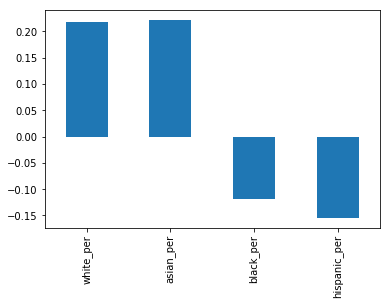

In [308]:
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

It looks like the higher percentages of white and asian students correlate with higher SAT scores, but higher percentages of black and hispanic students correlate with lower SAT scores. For hispanic students, this may be due to the fact that there are more recent immigrants who are ELL learners. 

## Gender differences in SAT scores

The final angle to explore is the relationship between gender and SAT score. We noted that a higher percentage of females in a school tends to correlate with higher SAT scores. We can visualize this with a bar graph:

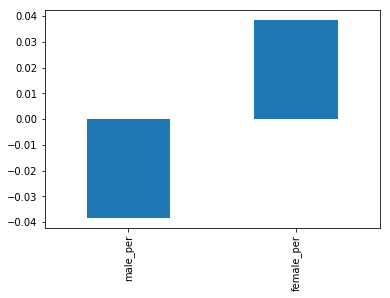

In [309]:
full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

To dig more into the correlation, we can make a scatterplot of female_per and sat_score:

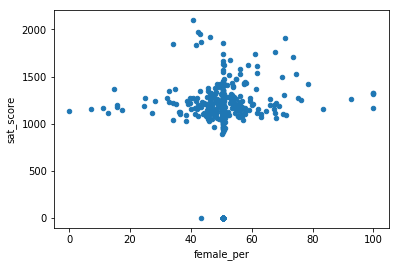

In [310]:
full.plot.scatter(x='female_per', y='sat_score')

It looks like there’s a cluster of schools with a high percentage of females, and very high SAT scores (in the top right). We can get the names of the schools in this cluster: